In [212]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

# defining global variable path
image_path = "ThaiCurrencies"

'''function to load folder into arrays and then it returns that same array'''

def loadfolders(path):
    df = pd.DataFrame(columns = ['image','label'])
    # Put files into lists and return them as one list of size 4
    folders = sorted([os.path.join(path,file) for file in os.listdir(path)])
    folders = folders[1:]
    for folder in folders:
        label = folder[15:] # eg. '100' in 'ThaiCurrencies/100' 
        for file in os.listdir(folder):
            img_path = os.path.join(folder,file)
            img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
            df.loc[file] = pd.Series({'image':img,'label': label})
            #df.append(pd.Series({'image':img,'label': label},name = file))
    return df


In [230]:
data = loadfolders(image_path)

Each row in dataframe has 2 elements: image, label, the index is image name
sample row: 
index:  ['THAI100_37.jpg']
label:  100
image:  [[[ 61 108  70]
  [ 72 119  81]
  [ 98 148 108]
  ...
  [ 26  69  42]
  [ 42  85  58]
  [ 53  96  69]]

 [[ 58 107  69]
  [ 40  89  51]
  [ 55 107  67]
  ...
  [ 21  64  37]
  [ 31  74  47]
  [ 42  85  58]]

 [[ 81 133  93]
  [ 57 109  69]
  [ 38  91  51]
  ...
  [ 17  60  33]
  [ 26  69  42]
  [ 42  85  58]]

 ...

 [[ 31  62  31]
  [ 38  72  41]
  [ 36  81  48]
  ...
  [  0  32   5]
  [ 56  97  70]
  [ 20  61  34]]

 [[ 50  78  48]
  [ 39  73  42]
  [ 21  66  33]
  ...
  [ 24  67  40]
  [ 49  92  65]
  [  6  47  20]]

 [[ 25  51  21]
  [ 26  58  27]
  [ 22  65  32]
  ...
  [ 37  80  53]
  [ 16  59  32]
  [  4  45  18]]]


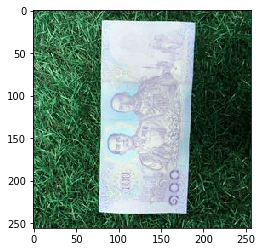

In [236]:
print('Each row in dataframe has 2 elements: image, label, the index is image name')
print('sample row: ')
print('index: ', data[:1].index.values)
print('label: ' , data['label'][0])
print('image: ', data['image'][0])
plt.imshow(data['image'][0])

In [280]:
#convert label(100,200,..) to one-hot labels(00100,01000,...), then save the new labels to csv file
label_df = data['label']
one_hot_labels = pd.concat([label_df , pd.get_dummies(label_df)] , axis = 1)
one_hot_labels.to_csv('one_hot_labels.csv')

In [303]:
#convert label(100,200,..) to one-hot labels(00100,01000,...), then save the new labels to csv file
label_df = pd.DataFrame({'name': data.iloc[:].index.values,'label':data['label'].values})
one_hot_labels = pd.concat([label_df.drop(columns = 'label'), pd.get_dummies(label_df['label'])] , axis = 1)
one_hot_labels.drop(index = 34,inplace = True)
one_hot_labels.to_csv('one_hot_labels.csv',index = False)